## Parameters affecting the loan interest rates for applicants based on their personal information

### Importing Data and packages:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('loan_data_train.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Interest.Rate
0,79542.0,25000,25000,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,18.49%
1,75473.0,19750,19750,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,17.27%
2,67265.0,2100,2100,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,14.33%
3,80167.0,28000,28000,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,16.29%
4,17240.0,24250,17431.82,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,12.23%


### Modify columns name

In [7]:
df.columns = df.columns.str.replace(".","_")
df.columns

Index(['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Loan_Length',
       'Loan_Purpose', 'Debt_To_Income_Ratio', 'State', 'Home_Ownership',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Interest_Rate'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2199 non-null   object 
 2   Amount_Funded_By_Investors      2199 non-null   object 
 3   Loan_Length                     2199 non-null   object 
 4   Loan_Purpose                    2199 non-null   object 
 5   Debt_To_Income_Ratio            2199 non-null   object 
 6   State                           2199 non-null   object 
 7   Home_Ownership                  2199 non-null   object 
 8   Monthly_Income                  2197 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2196 non-null   object 
 11  Revolving_CREDIT_Balance        2197 non-null   object 
 12  Inquiries_in_the_Last_6_Months  21

In [9]:
df.isnull().sum()

,0
ID,1
Amount_Requested,1
Amount_Funded_By_Investors,1
Loan_Length,1
Loan_Purpose,1
Debt_To_Income_Ratio,1
State,1
Home_Ownership,1
Monthly_Income,3
FICO_Range,0


In [10]:
df['Employment_Length'].mode()[0]

'10+ years'

In [11]:
df['Employment_Length']=df['Employment_Length'].fillna(df['Employment_Length'].mode()[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2199 non-null   object 
 2   Amount_Funded_By_Investors      2199 non-null   object 
 3   Loan_Length                     2199 non-null   object 
 4   Loan_Purpose                    2199 non-null   object 
 5   Debt_To_Income_Ratio            2199 non-null   object 
 6   State                           2199 non-null   object 
 7   Home_Ownership                  2199 non-null   object 
 8   Monthly_Income                  2197 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2196 non-null   object 
 11  Revolving_CREDIT_Balance        2197 non-null   object 
 12  Inquiries_in_the_Last_6_Months  21

In [13]:
df.dropna(axis=0 , inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2186 non-null   float64
 1   Amount_Requested                2186 non-null   object 
 2   Amount_Funded_By_Investors      2186 non-null   object 
 3   Loan_Length                     2186 non-null   object 
 4   Loan_Purpose                    2186 non-null   object 
 5   Debt_To_Income_Ratio            2186 non-null   object 
 6   State                           2186 non-null   object 
 7   Home_Ownership                  2186 non-null   object 
 8   Monthly_Income                  2186 non-null   float64
 9   FICO_Range                      2186 non-null   object 
 10  Open_CREDIT_Lines               2186 non-null   object 
 11  Revolving_CREDIT_Balance        2186 non-null   object 
 12  Inquiries_in_the_Last_6_Months  2186 no

## changing datatypes

In [15]:
df['Amount_Requested'] = pd.to_numeric(df['Amount_Requested'],errors = 'coerce')
df['Amount_Funded_By_Investors'] = pd.to_numeric(df['Amount_Funded_By_Investors'],errors = 'coerce')
df['Open_CREDIT_Lines'] = pd.to_numeric(df['Open_CREDIT_Lines'],errors = 'coerce')
df['Revolving_CREDIT_Balance'] = pd.to_numeric(df['Revolving_CREDIT_Balance'],errors = 'coerce')
df['Inquiries_in_the_Last_6_Months'] = pd.to_numeric(df['Inquiries_in_the_Last_6_Months'],errors = 'coerce')

In [16]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate
0,79542.0,25000.0,25000.00,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,18.49%
1,75473.0,19750.0,19750.00,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,17.27%
2,67265.0,2100.0,2100.00,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,14.33%
3,80167.0,28000.0,28000.00,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,16.29%
4,17240.0,24250.0,17431.82,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,12.23%


In [17]:
df['Interest_Rate']=df['Interest_Rate'].str.replace('%','').astype('float64')

In [18]:
df['Loan_Length']=df['Loan_Length'].str.split(' ').apply(lambda x : x[0]).tolist()

In [19]:
df['Loan_Length'] = pd.to_numeric(df['Loan_Length'],errors = 'coerce')

In [20]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].str.replace('%','').astype('float64')

In [21]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate
0,79542.0,25000.0,25000.00,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,18.49
1,75473.0,19750.0,19750.00,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,17.27
2,67265.0,2100.0,2100.00,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,14.33
3,80167.0,28000.0,28000.00,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,16.29
4,17240.0,24250.0,17431.82,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,12.23


In [22]:
df.Employment_Length = df.Employment_Length.str.replace('<','')
df.Employment_Length = df.Employment_Length.str.replace('years','')
df.Employment_Length = df.Employment_Length.str.replace('year','')
df.Employment_Length = df.Employment_Length.str.replace('+','')
df['Employment_Length'] = pd.to_numeric(df['Employment_Length'],errors = 'coerce')

In [23]:
df[['Min_Fic','Max_Fic']] = df.FICO_Range.str.split('-',expand=True).astype('float64')
df['Fico_Mean'] = (df.Min_Fic + df.Max_Fic)/2

display(df,df.dtypes)

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate,Min_Fic,Max_Fic,Fico_Mean
0,79542.0,25000.0,25000.00,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5.0,18.49,720.0,724.0,722.0
1,75473.0,19750.0,19750.00,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4.0,17.27,710.0,714.0,712.0
2,67265.0,2100.0,2100.00,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,1.0,14.33,690.0,694.0,692.0
3,80167.0,28000.0,28000.00,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10.0,16.29,710.0,714.0,712.0
4,17240.0,24250.0,17431.82,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10.0,12.23,730.0,734.0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000.0,30000.00,60.0,other,12.10,IL,MORTGAGE,7083.33,675-679,16.0,17969.0,1.0,10.0,23.28,675.0,679.0,677.0
2196,63768.0,4200.0,4200.00,60.0,car,14.16,NJ,RENT,3850.00,700-704,4.0,5718.0,0.0,2.0,14.33,700.0,704.0,702.0
2197,94545.0,19800.0,19775.00,60.0,debt_consolidation,15.03,IL,MORTGAGE,6666.67,675-679,10.0,46879.0,3.0,6.0,15.31,675.0,679.0,677.0
2198,53635.0,18000.0,18000.00,60.0,credit_card,11.63,CA,RENT,9051.83,670-674,5.0,32394.0,2.0,4.0,20.99,670.0,674.0,672.0


,0
ID,float64
Amount_Requested,float64
Amount_Funded_By_Investors,float64
Loan_Length,float64
Loan_Purpose,object
Debt_To_Income_Ratio,float64
State,object
Home_Ownership,object
Monthly_Income,float64
FICO_Range,object


In [24]:
## drop insignificant columns
df = df.drop(['ID','FICO_Range','Min_Fic','Max_Fic'],axis=1)
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate,Fico_Mean
0,25000.0,25000.00,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,18.49,722.0
1,19750.0,19750.00,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,17.27,712.0
2,2100.0,2100.00,36.0,major_purchase,3.50,LA,OWN,1000.00,13.0,893.0,1.0,1.0,14.33,692.0
3,28000.0,28000.00,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,10.0,16.29,712.0
4,24250.0,17431.82,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,10.0,12.23,732.0


In [25]:
df.Home_Ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER'], dtype=object)

In [26]:
df.State.unique()

array(['VA', 'NY', 'LA', 'NV', 'OH', 'CA', 'IL', 'NC', 'NJ', 'WA', 'CT',
       'AK', 'CO', 'MA', 'TX', 'VT', 'OK', 'FL', 'NH', 'GA', 'MN', 'MD',
       'WY', 'PA', 'AL', 'AZ', 'SC', 'MI', 'OR', 'RI', 'NM', 'MO', 'WI',
       'KY', 'UT', 'AR', 'WV', 'DE', 'MT', 'KS', 'DC', 'SD', 'HI', 'IN',
       'MS', '.'], dtype=object)

In [27]:
df.Loan_Purpose.unique()

array(['debt_consolidation', 'major_purchase', 'credit_card',
       'small_business', 'home_improvement', 'other', 'car', 'moving',
       'house', 'educational', 'vacation', 'wedding', 'medical',
       'renewable_energy'], dtype=object)

In [28]:
## Seperating Numerical variables and Categorical variables:
Numeric_data = df.columns[df.dtypes != 'object']
Cat_data = df.columns[df.dtypes == 'object']

Num_Vars = df[Numeric_data]
Cat_Vars = df[Cat_data]
Y_Var = df[['Interest_Rate']]
display('Num_Vars',Num_Vars.head(3),Num_Vars.shape,'Cat_Vars',Cat_Vars.head(3),Cat_Vars.shape,'Y_Var',Y_Var.head(3),Y_Var.shape)

'Num_Vars'

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate,Fico_Mean
0,25000.0,25000.0,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,18.49,722.0
1,19750.0,19750.0,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,17.27,712.0
2,2100.0,2100.0,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,14.33,692.0


(2186, 11)

'Cat_Vars'

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,VA,MORTGAGE
1,debt_consolidation,NY,MORTGAGE
2,major_purchase,LA,OWN


(2186, 3)

'Y_Var'

,Interest_Rate
0,18.49
1,17.27
2,14.33


(2186, 1)

In [29]:
Num_Vars = Num_Vars.drop('Interest_Rate',axis=1)
Num_Vars.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.0,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.0,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.0,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,692.0


### Missing value and Outlier treatment:

In [30]:
def outlier_missing_treatment(x):
    x = np.clip(x, a_min = x.quantile(0.01), a_max = x.quantile(0.99))
    x = x.fillna(x.median())
    return(x)

In [31]:
Num_Vars = Num_Vars.apply(outlier_missing_treatment)

In [32]:
def Mode_treatment(x):
    x = x.fillna(x.mode)
    return(x)

In [33]:
Cat_Vars = Cat_Vars.apply(Mode_treatment)

### Creating dummy variables of Cateforical Variables:

In [34]:
dummy_vars = pd.get_dummies(Cat_Vars, drop_first=True)
dummy_vars

,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2197,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2198,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
df_final = pd.concat([Num_Vars, dummy_vars, Y_Var], axis=1)

df_final

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate
0,25000.0,25000.00,60.0,27.56,8606.560,11.0,15210.0,3.0,5.0,722.0,...,True,False,False,False,False,False,False,False,False,18.49
1,19750.0,19750.00,60.0,13.39,6737.500,14.0,19070.0,3.0,4.0,712.0,...,False,False,False,False,False,False,False,False,False,17.27
2,2100.0,2100.00,36.0,3.50,1404.169,13.0,893.0,1.0,1.0,692.0,...,False,False,False,False,False,False,False,True,False,14.33
3,28000.0,28000.00,36.0,19.62,7083.330,12.0,38194.0,1.0,10.0,712.0,...,False,False,False,False,False,False,False,False,False,16.29
4,24250.0,17431.82,60.0,23.79,5833.330,6.0,31061.0,2.0,10.0,732.0,...,False,False,False,False,False,False,False,False,False,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,60.0,12.10,7083.330,16.0,17969.0,1.0,10.0,677.0,...,False,False,False,False,False,False,False,False,False,23.28
2196,4200.0,4200.00,60.0,14.16,3850.000,4.0,5718.0,0.0,2.0,702.0,...,False,False,False,False,False,False,False,False,True,14.33
2197,19800.0,19775.00,60.0,15.03,6666.670,10.0,46879.0,3.0,6.0,677.0,...,False,False,False,False,False,False,False,False,False,15.31
2198,18000.0,18000.00,60.0,11.63,9051.830,5.0,32394.0,2.0,4.0,672.0,...,False,False,False,False,False,False,False,False,True,20.99


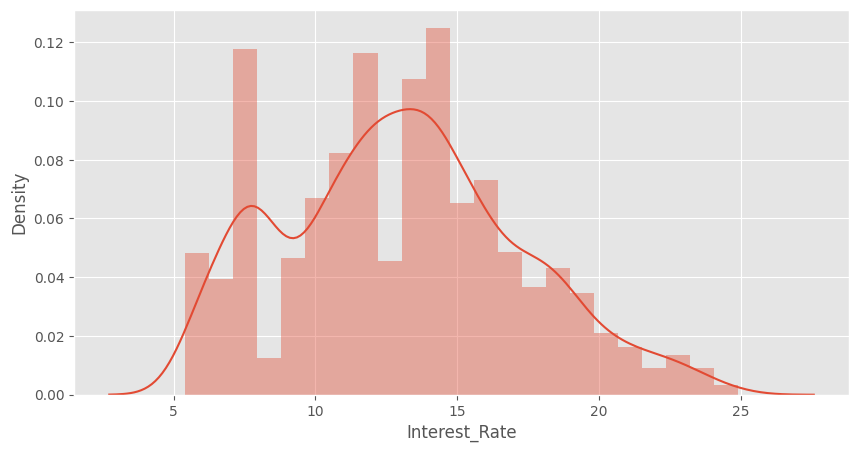

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(df_final.Interest_Rate)
plt.show()

### Section 2: Feature Reduction

In [37]:
target = df_final['Interest_Rate']
features = df_final[df_final.columns.difference(['Interest_Rate'])]

display(target, features)

,Interest_Rate
0,18.49
1,17.27
2,14.33
3,16.29
4,12.23
...,...
2195,23.28
2196,14.33
2197,15.31
2198,20.99


,Amount_Funded_By_Investors,Amount_Requested,Debt_To_Income_Ratio,Employment_Length,Fico_Mean,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Inquiries_in_the_Last_6_Months,Loan_Length,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,25000.00,25000.0,27.56,5.0,722.0,False,False,False,3.0,60.0,...,False,False,False,False,True,False,False,False,False,False
1,19750.00,19750.0,13.39,4.0,712.0,False,False,False,3.0,60.0,...,False,False,False,False,False,False,False,False,False,False
2,2100.00,2100.0,3.50,1.0,692.0,False,True,False,1.0,36.0,...,False,False,False,False,False,False,False,False,False,False
3,28000.00,28000.0,19.62,10.0,712.0,False,False,False,1.0,36.0,...,False,False,False,False,False,False,False,False,False,False
4,17431.82,24250.0,23.79,10.0,732.0,False,False,False,2.0,60.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.00,30000.0,12.10,10.0,677.0,False,False,False,1.0,60.0,...,False,False,False,False,False,False,False,False,False,False
2196,4200.00,4200.0,14.16,2.0,702.0,False,False,True,0.0,60.0,...,False,False,False,False,False,False,False,False,False,False
2197,19775.00,19800.0,15.03,6.0,677.0,False,False,False,3.0,60.0,...,False,False,False,False,False,False,False,False,False,False
2198,18000.00,18000.0,11.63,4.0,672.0,False,False,True,2.0,60.0,...,False,False,False,False,False,False,False,False,False,False


In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=10)

rfe = rfe.fit(features,target)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [55]:
RFE_imp_vars = features.columns[rfe.get_support()]
list(RFE_imp_vars)

['Home_Ownership_OTHER',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_renewable_energy',
 'State_AK',
 'State_HI',
 'State_LA',
 'State_MT',
 'State_SD',
 'State_VT']

In [56]:
from sklearn.feature_selection import f_regression

f_reg, p_val = f_regression(features,target)

f_reg = pd.Series(f_reg)
p_val = pd.Series(p_val)
cols = pd.Series(features.columns)

In [57]:
f_reg_res = pd.concat([cols,f_reg,p_val],axis=1)
f_reg_res.columns = ['cols','F_values','p_values']
f_reg_res

,cols,F_values,p_values
0,Amount_Funded_By_Investors,279.751224,3.493429e-59
1,Amount_Requested,271.853637,1.178647e-57
2,Debt_To_Income_Ratio,73.991827,1.472001e-17
3,Employment_Length,2.887689,8.940126e-02
4,Fico_Mean,2237.147784,0.000000e+00
...,...,...,...
66,State_VT,6.745034,9.464007e-03
67,State_WA,0.008284,9.274859e-01
68,State_WI,0.698737,4.032999e-01
69,State_WV,0.060388,8.059063e-01


In [58]:
top_10_f_reg = f_reg_res.sort_values(by=['F_values'],ascending=False).head(10)

list(top_10_f_reg.cols)

['Home_Ownership_OTHER',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_renewable_energy',
 'State_AK',
 'State_HI',
 'State_LA',
 'State_MT',
 'State_SD',
 'State_VT']

['Home_Ownership_OTHER',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_renewable_energy',
 'State_AK',
 'State_HI',
 'State_LA',
 'State_MT',
 'State_SD',
 'State_VT']

In [59]:
from sklearn.feature_selection import SelectKBest,f_classif ,chi2

selector = SelectKBest(f_classif, k=10)

selector.fit(features, target)

SelectKBest()

In [61]:
K_Best_10 = features.columns[selector.get_support()]

list(K_Best_10)

['Amount_Funded_By_Investors',
 'Amount_Requested',
 'Fico_Mean',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IN',
 'State_MO',
 'State_MS',
 'State_VT']

### Correlation Method:

In [62]:
df_final.corrwith(df_final.Interest_Rate)

,0
Amount_Requested,0.332710
Amount_Funded_By_Investors,0.336967
Loan_Length,0.426056
Debt_To_Income_Ratio,0.181022
Monthly_Income,0.038563
...,...
State_WY,0.004229
Home_Ownership_OTHER,0.035582
Home_Ownership_OWN,-0.024308
Home_Ownership_RENT,0.089989


In [63]:
column_names = pd.Series(list(df_final.corrwith(df_final.Interest_Rate).index),name='Column_Names')
r_values =  pd.Series(list(df_final.corrwith(df_final.Interest_Rate)),name='r_values')

corr = pd.concat([column_names,r_values],axis=1)

In [64]:
corr_10 = corr.sort_values(by=['r_values'],ascending=False).head(10)

list(corr_10['Column_Names'])

['Interest_Rate',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Home_Ownership_RENT',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance']

### Final Variables

In [65]:
Final_Vars = {
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
'Amount_Funded_By_Investors',
 'Fico_Mean',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IN',
 'State_MS',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance'}

In [66]:
Final_Vars = list(Final_Vars)

features2 = df_final[Final_Vars]

features2

,Debt_To_Income_Ratio,Amount_Requested,State_MT,State_IN,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,State_SD,Loan_Purpose_home_improvement,Loan_Purpose_other,Home_Ownership_RENT,...,Loan_Purpose_house,Loan_Purpose_major_purchase,Revolving_CREDIT_Balance,State_MS,Loan_Purpose_debt_consolidation,Loan_Purpose_credit_card,Loan_Purpose_small_business,Fico_Mean,Loan_Purpose_moving,Loan_Length
0,27.56,25000.0,False,False,25000.00,3.0,False,False,False,False,...,False,False,15210.0,False,True,False,False,722.0,False,60.0
1,13.39,19750.0,False,False,19750.00,3.0,False,False,False,False,...,False,False,19070.0,False,True,False,False,712.0,False,60.0
2,3.50,2100.0,False,False,2100.00,1.0,False,False,False,False,...,False,True,893.0,False,False,False,False,692.0,False,36.0
3,19.62,28000.0,False,False,28000.00,1.0,False,False,False,False,...,False,False,38194.0,False,False,True,False,712.0,False,36.0
4,23.79,24250.0,False,False,17431.82,2.0,False,False,False,False,...,False,False,31061.0,False,False,True,False,732.0,False,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,12.10,30000.0,False,False,30000.00,1.0,False,False,True,False,...,False,False,17969.0,False,False,False,False,677.0,False,60.0
2196,14.16,4200.0,False,False,4200.00,0.0,False,False,False,True,...,False,False,5718.0,False,False,False,False,702.0,False,60.0
2197,15.03,19800.0,False,False,19775.00,3.0,False,False,False,False,...,False,False,46879.0,False,True,False,False,677.0,False,60.0
2198,11.63,18000.0,False,False,18000.00,2.0,False,False,False,True,...,False,False,32394.0,False,False,True,False,672.0,False,60.0


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [70]:
# Convert boolean columns to integers (0 and 1)
features2 = features2.astype({col: 'int64' for col in features2.select_dtypes(include='bool').columns})

In [71]:
# Convert everything to numeric, just in case
features2 = features2.apply(pd.to_numeric, errors='coerce')

# Fill any missing values
features2 = features2.fillna(features2.median())

# Now compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = features2.columns
vif_data["VIF"] = [variance_inflation_factor(features2.values, i) for i in range(features2.shape[1])]
vif_data


,feature,VIF
0,Debt_To_Income_Ratio,5.667761
1,Amount_Requested,61.419612
2,State_MT,1.010557
3,State_IN,1.014189
4,Amount_Funded_By_Investors,58.144916
5,Inquiries_in_the_Last_6_Months,1.668924
6,State_SD,1.007011
7,Loan_Purpose_home_improvement,2.135593
8,Loan_Purpose_other,2.288376
9,Home_Ownership_RENT,1.976987


In [72]:
features2.dtypes

,0
Debt_To_Income_Ratio,float64
Amount_Requested,float64
State_MT,int64
State_IN,int64
Amount_Funded_By_Investors,float64
Inquiries_in_the_Last_6_Months,float64
State_SD,int64
Loan_Purpose_home_improvement,int64
Loan_Purpose_other,int64
Home_Ownership_RENT,int64


In [73]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]

In [74]:
VIF = pd.Series(VIF, name = 'VIF')

cols = pd.Series(features2.columns, name='Column_Name')

VIF_res = pd.concat([cols,VIF],axis=1)

VIF_10 = VIF_res.sort_values(by=['VIF']).head(10)

In [75]:
Final_Vars.append('Interest_Rate')

df_final = df_final[Final_Vars]

df_final

,Debt_To_Income_Ratio,Amount_Requested,State_MT,State_IN,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,State_SD,Loan_Purpose_home_improvement,Loan_Purpose_other,Home_Ownership_RENT,...,Loan_Purpose_major_purchase,Revolving_CREDIT_Balance,State_MS,Loan_Purpose_debt_consolidation,Loan_Purpose_credit_card,Loan_Purpose_small_business,Fico_Mean,Loan_Purpose_moving,Loan_Length,Interest_Rate
0,27.56,25000.0,False,False,25000.00,3.0,False,False,False,False,...,False,15210.0,False,True,False,False,722.0,False,60.0,18.49
1,13.39,19750.0,False,False,19750.00,3.0,False,False,False,False,...,False,19070.0,False,True,False,False,712.0,False,60.0,17.27
2,3.50,2100.0,False,False,2100.00,1.0,False,False,False,False,...,True,893.0,False,False,False,False,692.0,False,36.0,14.33
3,19.62,28000.0,False,False,28000.00,1.0,False,False,False,False,...,False,38194.0,False,False,True,False,712.0,False,36.0,16.29
4,23.79,24250.0,False,False,17431.82,2.0,False,False,False,False,...,False,31061.0,False,False,True,False,732.0,False,60.0,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,12.10,30000.0,False,False,30000.00,1.0,False,False,True,False,...,False,17969.0,False,False,False,False,677.0,False,60.0,23.28
2196,14.16,4200.0,False,False,4200.00,0.0,False,False,False,True,...,False,5718.0,False,False,False,False,702.0,False,60.0,14.33
2197,15.03,19800.0,False,False,19775.00,3.0,False,False,False,False,...,False,46879.0,False,True,False,False,677.0,False,60.0,15.31
2198,11.63,18000.0,False,False,18000.00,2.0,False,False,False,True,...,False,32394.0,False,False,True,False,672.0,False,60.0,20.99


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train,test = train_test_split(df_final, test_size = 0.3, random_state = 123)

In [78]:
import statsmodels.formula.api as smf

In [79]:
model = smf.ols('Interest_Rate ~ Loan_Purpose_educational + Loan_Purpose_house +State_MS+ Loan_Length+ Fico_Mean+ Loan_Purpose_other+ Loan_Purpose_credit_card+ Home_Ownership_RENT+State_IN+ Loan_Purpose_small_business+ State_SD+Debt_To_Income_Ratio+ Loan_Purpose_debt_consolidation+Home_Ownership_OTHER+ Amount_Requested+ Revolving_CREDIT_Balance+State_MT+ Loan_Purpose_home_improvement+Amount_Funded_By_Investors+ Loan_Purpose_moving+Inquiries_in_the_Last_6_Months+ Loan_Purpose_major_purchase', data=train).fit()

print(model.summary2())

                            Results: Ordinary least squares
Model:                      OLS                     Adj. R-squared:            0.766    
Dependent Variable:         Interest_Rate           AIC:                       6554.9856
Date:                       2025-07-07 06:57        BIC:                       6677.6451
No. Observations:           1530                    Log-Likelihood:            -3254.5  
Df Model:                   22                      F-statistic:               228.0    
Df Residuals:               1507                    Prob (F-statistic):        0.00     
R-squared:                  0.769                   Scale:                     4.1850   
----------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------
Intercept                               67.4050   

## Now reducing Varibales on basis of P-value:

In [80]:
model = smf.ols('Interest_Rate ~ Loan_Length+ Fico_Mean + Amount_Funded_By_Investors+ Inquiries_in_the_Last_6_Months', data=train).fit()

print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.760    
Dependent Variable:      Interest_Rate        AIC:                    6574.8807
Date:                    2025-07-07 06:58     BIC:                    6601.5458
No. Observations:        1530                 Log-Likelihood:         -3282.4  
Df Model:                4                    F-statistic:            1210.    
Df Residuals:            1525                 Prob (F-statistic):     0.00     
R-squared:               0.760                Scale:                  4.2895   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      66.4861   1.0977  60.5663 0.0000 64.3329 68.6393
Loan_Length                     0.1374   0.0059  23.3930 0.0000 

## 4: Post Model

In [81]:
train['pred'] = model.predict(train)

train.head(3)

,Debt_To_Income_Ratio,Amount_Requested,State_MT,State_IN,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,State_SD,Loan_Purpose_home_improvement,Loan_Purpose_other,Home_Ownership_RENT,...,Revolving_CREDIT_Balance,State_MS,Loan_Purpose_debt_consolidation,Loan_Purpose_credit_card,Loan_Purpose_small_business,Fico_Mean,Loan_Purpose_moving,Loan_Length,Interest_Rate,pred
1828,20.09,19800.0,False,False,19775.0,0.0,False,False,False,False,...,31220.0,False,False,True,False,732.0,False,36.0,13.23,11.010102
1685,28.77,5000.0,False,False,5000.0,1.0,False,False,False,True,...,0.0,False,True,False,False,752.0,False,36.0,9.91,7.580582
1696,19.93,22500.0,False,False,22500.0,0.0,False,False,True,False,...,22876.0,False,False,False,False,757.0,False,36.0,7.90,9.238807


In [82]:
test['pred'] = model.predict(test)

test.head(3)

,Debt_To_Income_Ratio,Amount_Requested,State_MT,State_IN,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,State_SD,Loan_Purpose_home_improvement,Loan_Purpose_other,Home_Ownership_RENT,...,Revolving_CREDIT_Balance,State_MS,Loan_Purpose_debt_consolidation,Loan_Purpose_credit_card,Loan_Purpose_small_business,Fico_Mean,Loan_Purpose_moving,Loan_Length,Interest_Rate,pred
237,8.70,8400.0,False,False,8400.0,0.0,False,False,False,False,...,6215.0,False,False,True,False,752.0,False,36.0,5.99,7.659606
1402,27.50,14000.0,False,False,14000.0,3.0,False,False,False,True,...,18813.0,False,False,False,True,697.0,False,36.0,14.09,14.428181
597,29.51,14600.0,False,False,14600.0,1.0,False,False,False,False,...,23616.0,False,False,True,False,732.0,False,36.0,9.76,10.677895


In [83]:
from sklearn import metrics
import scipy.stats as stats

In [84]:
MAPE_train = round(np.mean(np.abs((train.Interest_Rate - train.pred)/train.Interest_Rate))*100,2)
print('MAPE_train',MAPE_train)

MSE_train = metrics.mean_squared_error(train.Interest_Rate , train.pred)
print('MSE_train',MSE_train)

Corr_train = stats.stats.pearsonr(train.Interest_Rate , train.pred)
print('Corr_train',Corr_train)

MAPE_train 13.86
MSE_train 4.275472430335734
Corr_train PearsonRResult(statistic=np.float64(0.8720054412311917), pvalue=np.float64(0.0))


In [85]:
MAPE_test = round(np.mean(np.abs((test.Interest_Rate - test.pred)/test.Interest_Rate))*100,2)
print('MAPE_test',MAPE_test)

MSE_test = metrics.mean_squared_error(test.Interest_Rate , test.pred)
print('MSE_test',MSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_Rate , test.pred)
print('Corr_test',Corr_test)

MAPE_test 13.21
MSE_test 3.8988886969847
Corr_test PearsonRResult(statistic=np.float64(0.8721475413708415), pvalue=np.float64(3.1787847132469242e-205))


In [88]:
from sklearn.metrics import r2_score
print(r2_score(test.Interest_Rate, test.pred))


0.7605553853856837
